In [2]:
import pandas as pd
import numpy as np
autos_df = pd.read_csv('autos.csv',encoding = "ISO-8859-1")

autos_df.drop(['offerType'], axis=1, inplace=True)
autos_df.drop(['seller'], axis=1, inplace=True)
autos_df.drop(['nrOfPictures'], axis=1, inplace=True)
autos_df.drop(['dateCrawled'], axis=1, inplace=True)
autos_df.drop(['dateCreated'], axis=1, inplace=True)
autos_df.drop(['lastSeen'], axis=1, inplace=True)
autos_df.drop(['postalCode'], axis=1, inplace=True)
autos_df.drop(['name'], axis=1, inplace=True)
autos_df.drop(['model'], axis=1, inplace=True)
autos_df = autos_df.dropna(axis=0, how='any')
autos_df = autos_df [(autos_df.price>1000) & (autos_df.price < 200000)]
autos_df.info()

autos_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222169 entries, 1 to 371527
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   price                222169 non-null  int64 
 1   abtest               222169 non-null  object
 2   vehicleType          222169 non-null  object
 3   yearOfRegistration   222169 non-null  int64 
 4   gearbox              222169 non-null  object
 5   powerPS              222169 non-null  int64 
 6   kilometer            222169 non-null  int64 
 7   monthOfRegistration  222169 non-null  int64 
 8   fuelType             222169 non-null  object
 9   brand                222169 non-null  object
 10  notRepairedDamage    222169 non-null  object
dtypes: int64(5), object(6)
memory usage: 20.3+ MB


,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
1,18300,test,coupe,2011,manuell,190,125000,5,diesel,audi,ja
3,1500,test,kleinwagen,2001,manuell,75,150000,6,benzin,volkswagen,nein
4,3600,test,kleinwagen,2008,manuell,69,90000,7,diesel,skoda,nein
6,2200,test,cabrio,2004,manuell,109,150000,8,benzin,peugeot,nein
10,2000,control,limousine,2004,manuell,105,150000,12,benzin,mazda,nein
...,...,...,...,...,...,...,...,...,...,...,...
371520,3200,control,limousine,2004,manuell,225,150000,5,benzin,seat,ja
371521,1150,control,bus,2000,manuell,0,150000,3,benzin,opel,nein
371524,1199,test,cabrio,2000,automatik,101,125000,3,benzin,smart,nein
371525,9200,test,bus,1996,manuell,102,150000,3,diesel,volkswagen,nein


In [3]:
from sklearn.preprocessing import LabelEncoder

data = autos_df.copy()

data["vehicleType"] =LabelEncoder().fit_transform(data["vehicleType"])
data["fuelType"] =LabelEncoder().fit_transform(data["fuelType"])
data["gearbox"] =LabelEncoder().fit_transform(data["gearbox"])
data["notRepairedDamage"] =LabelEncoder().fit_transform(data["notRepairedDamage"])
data["brand"] =LabelEncoder().fit_transform(data["brand"])
data["abtest"] =LabelEncoder().fit_transform(data["abtest"])
print(data['price'].skew())

5.078474398721116


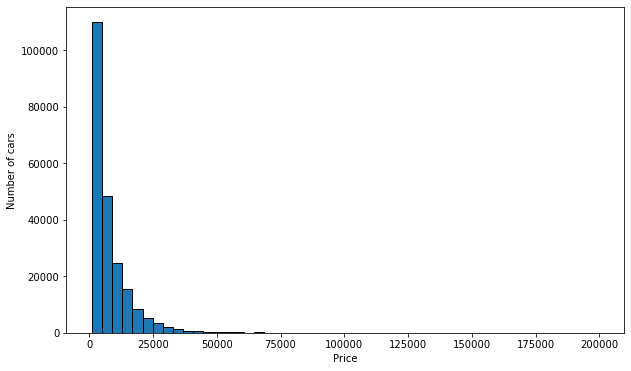

In [4]:
# Distribution price
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.hist(data['price'], bins=50, ec='black')
plt.xlabel('Price')
plt.ylabel('Number of cars')
plt.show()


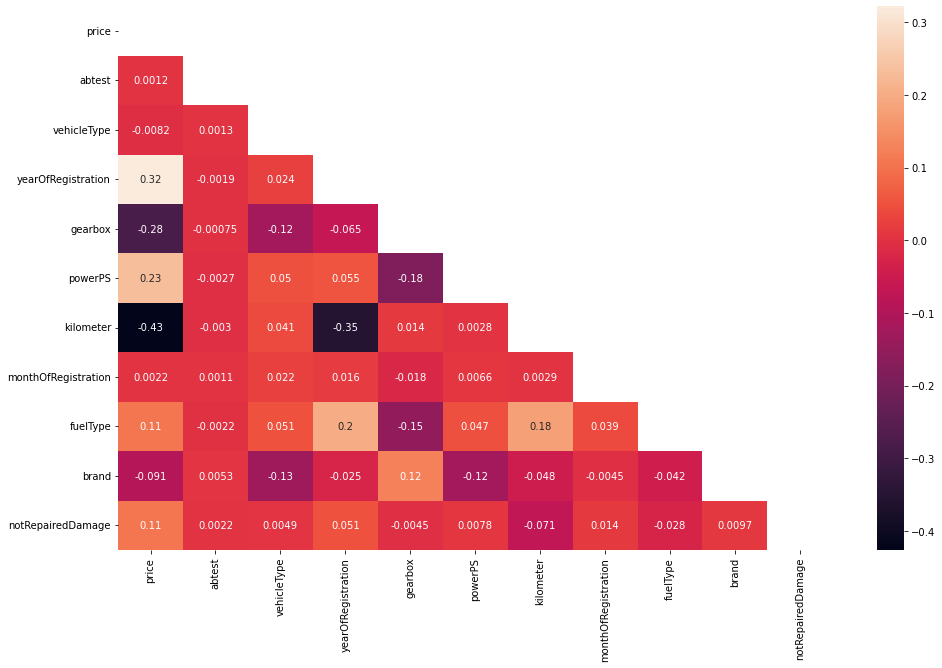

In [5]:
# Correlation heatmap
import seaborn as sns
mask = np.zeros_like(data.corr())
triangle = np.triu_indices_from(mask)
mask[triangle] = True
mask

plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), mask=mask, annot=True)
plt.show()


In [6]:
# Data preparing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
ss = StandardScaler()

y = data['price']
x = data.drop('price', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x,y,shuffle=True)

x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)


In [7]:
#LinearRigression w/o log
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

print("Training set score: {:.10f}".format(lr.score(x_train, y_train))) 
print("Test set score: {:.10f}".format(lr.score(x_test, y_test))) 

Training set score: 0.3391491580
Test set score: 0.3305591269


In [8]:
#RidgeCV w/o log
from sklearn.linear_model import RidgeCV

alpha_range = [0.0001,0.01, 0.1, 1, 10, 100]

ridge = RidgeCV(alphas=alpha_range, cv=5)
ridge.fit(x_train,y_train)
print("Training set score: {:.10f}".format(ridge.score(x_train, y_train))) 
print("Test set score: {:.10f}".format(ridge.score(x_test, y_test)))

Training set score: 0.3391490673
Test set score: 0.3305536847


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


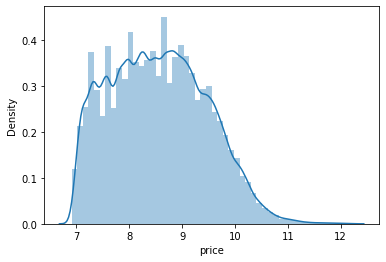

In [9]:
#log price
y_log = np.log(data['price'])
y_log.skew()

sns.distplot(y_log)
plt.show()

In [10]:
# New split
y = y_log
x = data.drop('price', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x,y,shuffle=True)

x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)


In [11]:
#LinearRigression with log
lr.fit(x_train, y_train)

print("Training set score: {:.10f}".format(lr.score(x_train, y_train))) 
print("Test set score: {:.10f}".format(lr.score(x_test, y_test))) 

Training set score: 0.4752998034
Test set score: 0.4756031040


In [12]:
#RidgeCV with log
ridge = RidgeCV(alphas=alpha_range, cv=5)
ridge.fit(x_train,y_train)
print("Training set score: {:.10f}".format(ridge.score(x_train, y_train))) 
print("Test set score: {:.10f}".format(ridge.score(x_test, y_test)))


Training set score: 0.4752997047
Test set score: 0.4756057929


In [13]:
#p-value
import statsmodels.api as sm

model = sm.OLS(y_train, x_train)
res = model.fit()
pd.DataFrame({'coeff' : res.params, 'p-value' : round(res.pvalues, 5)})


,coeff,p-value
x1,0.000390,0.98519
x2,-0.038698,0.06993
x3,0.254428,0.00000
x4,-0.195541,0.00000
x5,0.141406,0.00000
x6,-0.347139,0.00000
x7,0.001757,0.93346
x8,0.152552,0.00000
x9,-0.073815,0.00059
x10,0.110633,0.00000


In [14]:
# Correllation
y_pred_1 = lr.predict(x_test)
df_pred_1 = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred_1})
df_pred_1

,Actual,Predicted
252885,9.328123,9.617212
304877,7.207860,7.567710
178508,8.881836,8.651456
85654,8.294050,8.587562
358392,7.955074,7.753680
...,...,...
46445,7.863267,8.335339
116161,9.047704,8.289357
34342,9.159047,10.359525
244373,7.673223,8.297069


In [15]:
df_pred_1.corr()

,Actual,Predicted
Actual,1.000000,0.689665
Predicted,0.689665,1.000000


In [16]:
df_pred_1.corr('spearman')

,Actual,Predicted
Actual,1.000000,0.715294
Predicted,0.715294,1.000000


In [17]:
y_pred_2 = ridge.predict(x_test)
df_pred_2 = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred_2})
df_pred_2

,Actual,Predicted
252885,9.328123,9.616655
304877,7.207860,7.568147
178508,8.881836,8.651446
85654,8.294050,8.587589
358392,7.955074,7.754036
...,...,...
46445,7.863267,8.335443
116161,9.047704,8.289535
34342,9.159047,10.358471
244373,7.673223,8.297163


In [18]:
df_pred_2.corr()

,Actual,Predicted
Actual,1.000000,0.689666
Predicted,0.689666,1.000000


In [19]:
df_pred_2.corr('spearman')

,Actual,Predicted
Actual,1.000000,0.715309
Predicted,0.715309,1.000000


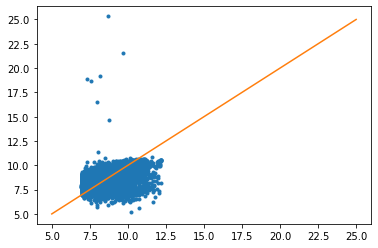

In [24]:
y_pred = ridge.predict(x_test)
plt.plot(y_test, y_pred, '.')
x = np.linspace(25,5,25)
y = x
plt.plot(x,y)
plt.show()